# House Prices Challenge: Predicting house prices


This notebook is the second part of the house price modeling and is a more simplified version of it. We worked with fewer features than the original dataset and simplified feature engineering and data preprocessing steps that are in the other notebook for more detail. The goal is to be able to quickly get to training a model and see the potential of the model and applications.

This is a very basic example of ML predictive modeling, addressing the fundamental stages of an analytics problem. In this case we will explore the popular "house prices" dataset, a core competency of the kaggle platform, to understand the fundamental stages in developing a predictive model.

It includes the following approaches and techniques:

- EDA (Exploration Data Analysis)
- Understanding correlation between features and targets
- Data Wrangling, convert categorical to numerical
- Apply the basic Multivariate Regression models (model selection)
- Model Understanding and interpretation


In case you only want to see the model creation and interpretation stage, skip to 9 part Model Development stage.




# 0. Summary

This exercise is to show the potential of predictive models and the influence they can have on decision making.

Through a method we were able to generate a model that could present good generalization and quite good performance, considering the that we are using the simplest model,  which results in an error of 12%, without applying advanced feature engineering techniques or more advanced machine learning models. The interpretability of the model and the impact it could have on future business decisions are evaluated.

The big challenge was the proper detection and decision-cutting of outliers, the reassessment of noise-generating features, and the combined combination of selection and data engineering strategies.

We can put into practice a great number of techniques and methods, from EDA to the generation of stacked models, covering a broad conceptual and practical expectation as desired.

We determined that the area and quality of construction material are the most significant factor on house prices, over Zones or Neighborhood, things that intuitively make sense be the most important (**for this specific model**)

If we wanted to increase the valuation of the houses, I would look for an economic trade off between quality of building material and the area available to make the houses, as shown in the following parallel plot, medium área and high quality, give us a high house price, to interpret the solution !!

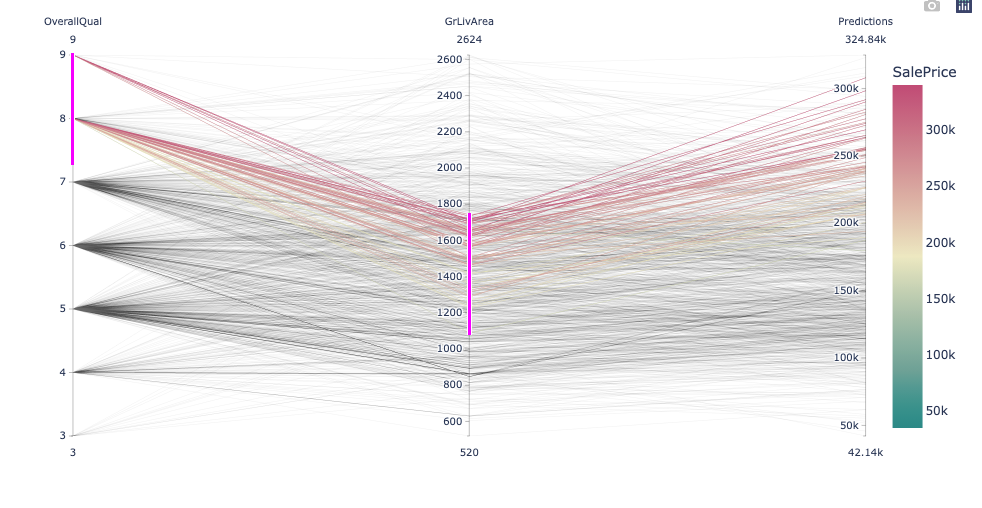




# 1. Basic Math Concetps

### Numerical vs Categorical Data
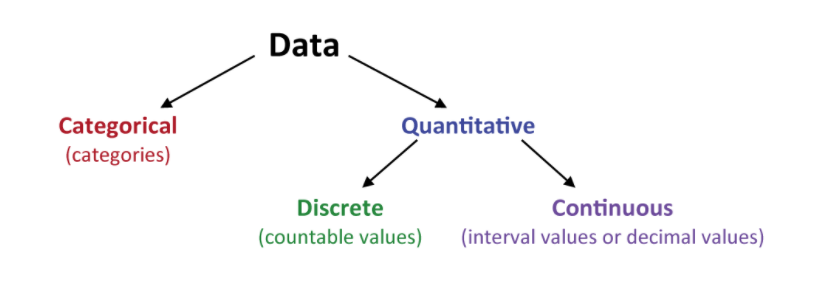


### Dependent and Independent Variables

In research, variables are any characteristics that can take on different values, such as height, age, species, or exam score.

In scientific research, we often want to study the effect of one variable on another one. For example, you might want to test whether students who spend more time studying get better exam scores.

The variables in a study of a cause-and-effect relationship are called the independent and dependent variables.

- The independent variable is the cause. Its value is independent of other variables in your study --> Model Features
- The dependent variable is the effect. Its value depends on changes in the independent variable --> Model Target 

We want to understand how independent variables affects dependent variables


### Correlation of variables

Pearson's correlation coefficient (r) is a measure of linear correlation between two variables. Its value is between -1 and +1, -1 indicating a total negative linear correlation, 0 indicating no linear correlation, and 1 indicating a total positive linear correlation. In addition, r is invariant under separate changes in the location and scale of the two variables, implying that for a linear function the angle with the x-axis does not affect r.

So we need higth correlation between features and target, and low correlation between the features, that we selected


### Multicollinearity

Occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results. So in this example we are going to avoid this situation

### Outliers

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.

A graph that displays an outlier.Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.



### Multivariate Regression

Multivariate Regression is a method used to measure the degree at which more than one independent variable (predictors) and more than one dependent variable (responses), are linearly related. The method is broadly used to predict the behavior of the response variables associated to changes in the predictor variables, once a desired degree of relation has been established.


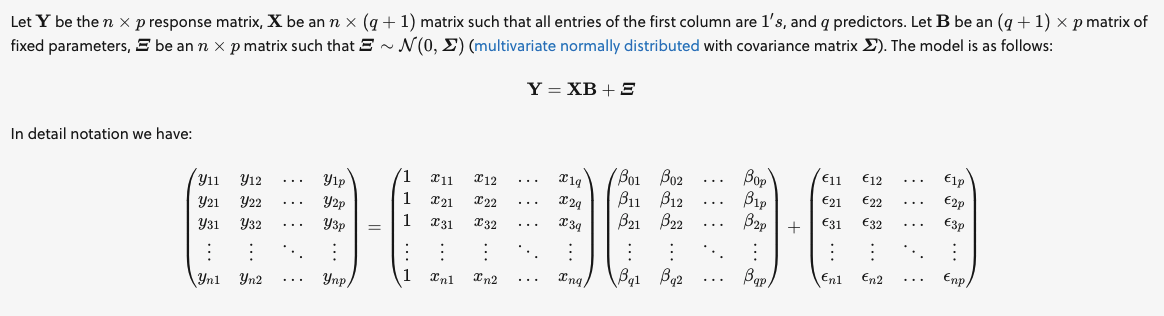


In [1]:
# ! pip install pandas
# ! pip install seaborn
# ! pip install plotly
# ! pip install matplotlib
# ! pip install -U scikit-learn

# 2. Import libraries

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from numpy import arange
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
%matplotlib inline
warnings.filterwarnings("ignore")


# 3. Import Data

In [3]:
# import data from .csv file
data = pd.read_csv("data/data_cleaned.csv")

In [4]:
# shows first 10 rows on data
data.head(10)

SalePrice  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
0     208500            7       1710           2          856         2   
1     181500            6       1262           2         1262         2   
2     223500            7       1786           2          920         2   
3     140000            7       1717           3          756         1   
4     143000            5       1362           2          796         1   
5     307000            8       1694           2         1686         2   
6     200000            7       2090           2         1107         2   
7     129900            7       1774           2          952         2   
8     118000            5       1077           1          991         1   
9     129500            5       1040           1         1040         1   

   YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces MSZoning Neighborhood  \
0       2003          2003       196.0           0       RL      CollgCr   
1       1976          1976         0.0           1       RL      Veenker   
2       2001          2002       162.0           1       RL      CollgCr   
3       1915          1970         0.0           1       RL      Crawfor   
4       1993          1995         0.0           0       RL      Mitchel   
5       2004          2005       186.0           1       RL      Somerst   
6       1973          1973       240.0           2       RL       NWAmes   
7       1931          1950         0.0           2       RM      OldTown   
8       1939          1950         0.0           2       RL      BrkSide   
9       1965          1965         0.0           0       RL       Sawyer   

  Condition2 MasVnrType ExterQual BsmtQual CentralAir Electrical KitchenQual  \
0       Norm    BrkFace        Gd       Gd          Y      SBrkr          Gd   
1       Norm       None        TA       Gd          Y      SBrkr          TA   
2       Norm    BrkFace        Gd       Gd          Y      SBrkr          Gd   
3       Norm       None        TA       TA          Y      SBrkr          Gd   
4       Norm       None        TA       Gd          Y      SBrkr          TA   
5       Norm      Stone        Gd       Ex          Y      SBrkr          Gd   
6       Norm      Stone        TA       Gd          Y      SBrkr          TA   
7       Norm       None        TA       TA          Y      FuseF          TA   
8     Artery       None        TA       TA          Y      SBrkr          TA   
9       Norm       None        TA       TA          Y      SBrkr          TA   

  SaleType  
0       WD  
1       WD  
2       WD  
3       WD  
4       WD  
5       WD  
6       WD  
7       WD  
8       WD  
9       WD

In [5]:
# show data dimensions
data.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
       'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType'],
      dtype='object')

# 4. Data Description

Here's a brief version of what you'll find in the data description file [data_description.txt].

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- OverallQual: Overall material and finish quality
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- TotalBsmtSF: Total square feet of basement area
- BsmtFullBath: Basement full bathrooms
- FullBath: Full bathrooms above grade
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- MasVnrArea: Masonry veneer area in square feet
- Fireplaces: Number of fireplaces
- MSZoning: The general zoning classification
- Neighborhood: Physical locations within Ames city limits
- Condition2: Proximity to main road or railroad (if a second is present)
- MasVnrType: Masonry veneer type
- ExterQual: Exterior material quality
- BsmtQual: Height of the basement
- CentralAir: Central air conditioning
- Electrical: Electrical system
- KitchenQual: Kitchen quality
- SaleType: Type of sale



# 5. Exploration Data Analysis

In [6]:
# Numerical and categorical features
numerical_feats = data.dtypes[data.dtypes != "object"].index
categorical_feats = data.dtypes[data.dtypes == "object"].index

In [7]:
numerical_feats

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces'],
      dtype='object')

In [8]:
categorical_feats

Index(['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
       'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType'],
      dtype='object')

## 5.1 Understanding Distributions and correlations

This graph shows two plots within the numerical columns.

Diagonal: Histogram that has the distributions of each variable, where we can make assumptions about it (normal, binomial, poisson, etc).

Matrix: Correlation plots, you can see each variable graphed with respect to the other, the most interesting to observe is the first column of graphs that shows all the features vs target (SalePrice). 

These plots allow us to understand ranges in which a variable moves, relationships between them, etc.

For example, strong linear correlation between GrLivArea, YearBuilt, TotalBsmtSF (among others) and SalePrice 



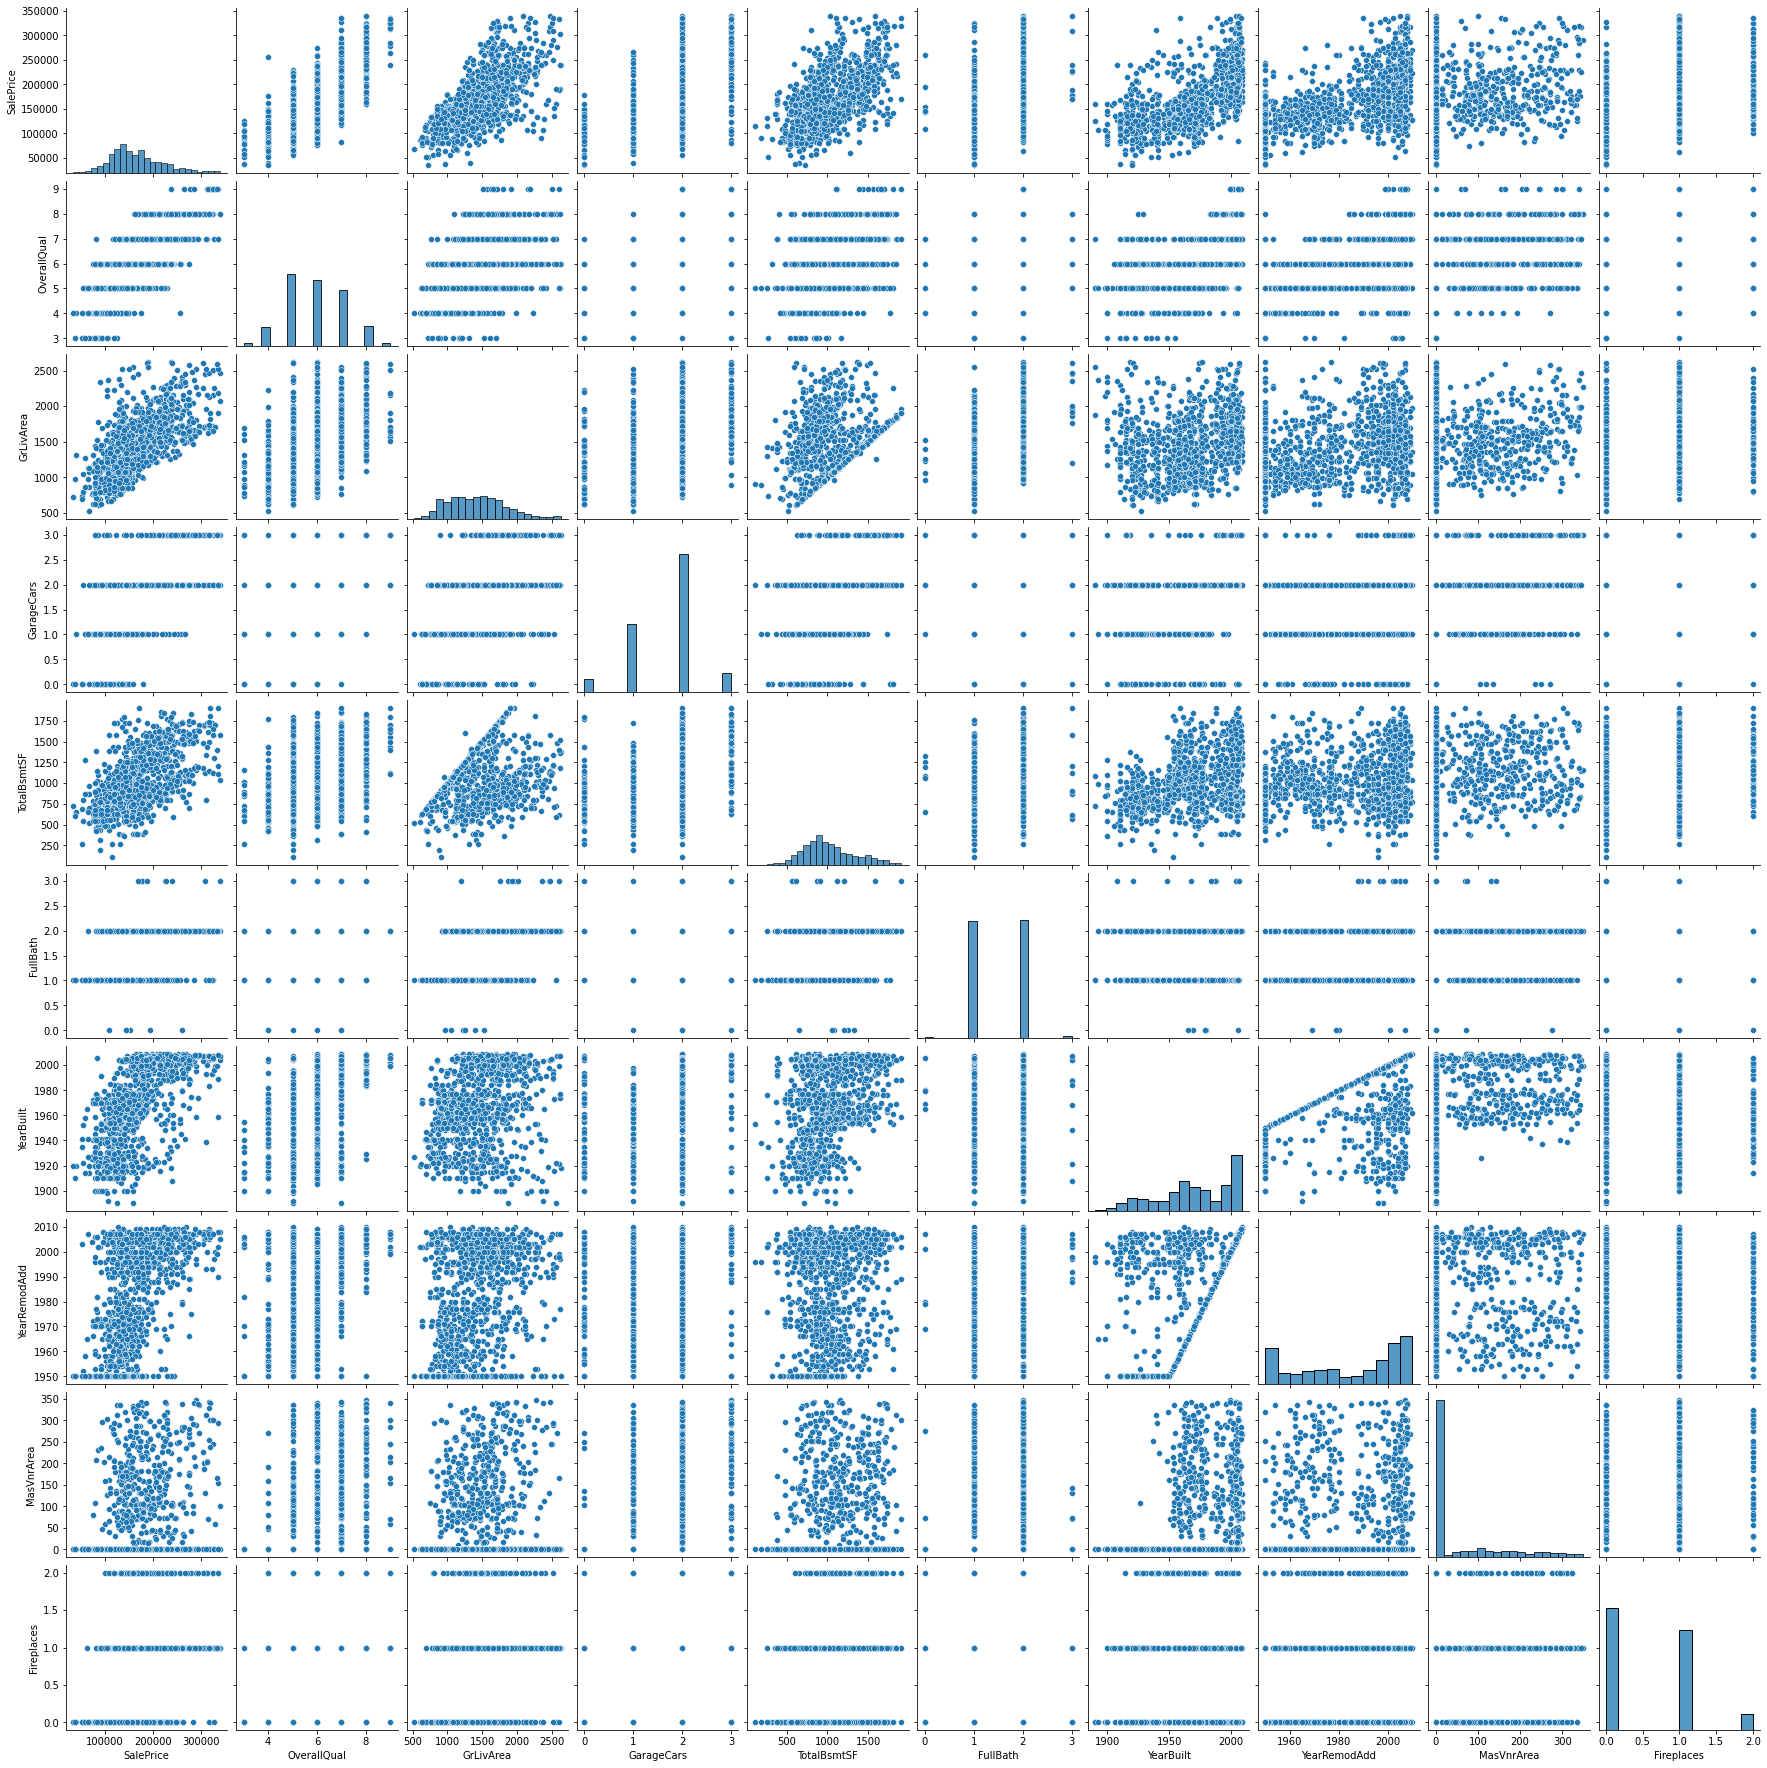

In [9]:
sns.pairplot(data)

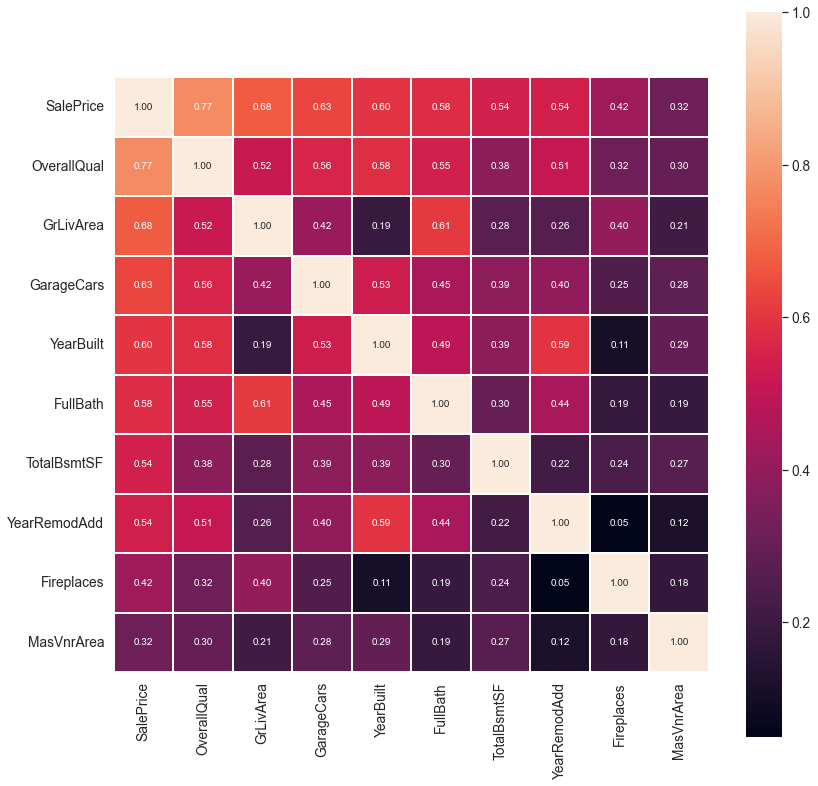

In [10]:
def plot_corr_matrix(df, nr_c, targ) :
    """
    Create correlation matrix to understand relation with target
    """
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

target = "SalePrice"
nr_feats = len(data.columns)
plot_corr_matrix(data, nr_feats, target)

## 6.1 Conclusion from EDA on numerical columns:

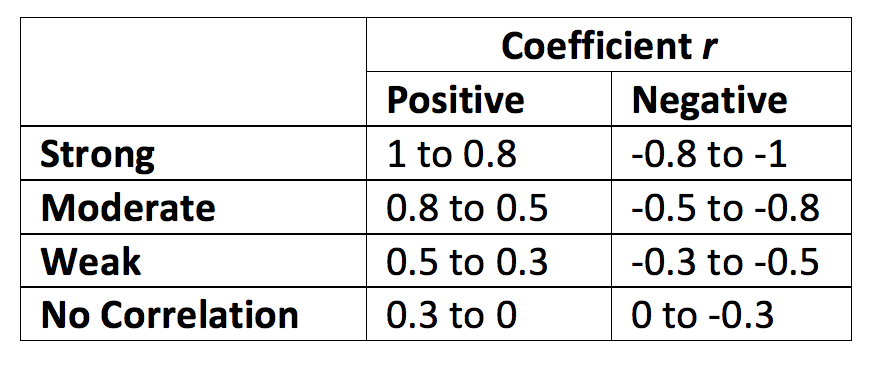

We see that for some features like 'OverallQual' there is a strong linear correlation (0.77) to the target.

For this kernel I decided to use only those features for prediction that have a correlation larger than a threshold value to SalePrice. For this case we have only moderate correlation beetween features, so we are going to keep all numerical features.






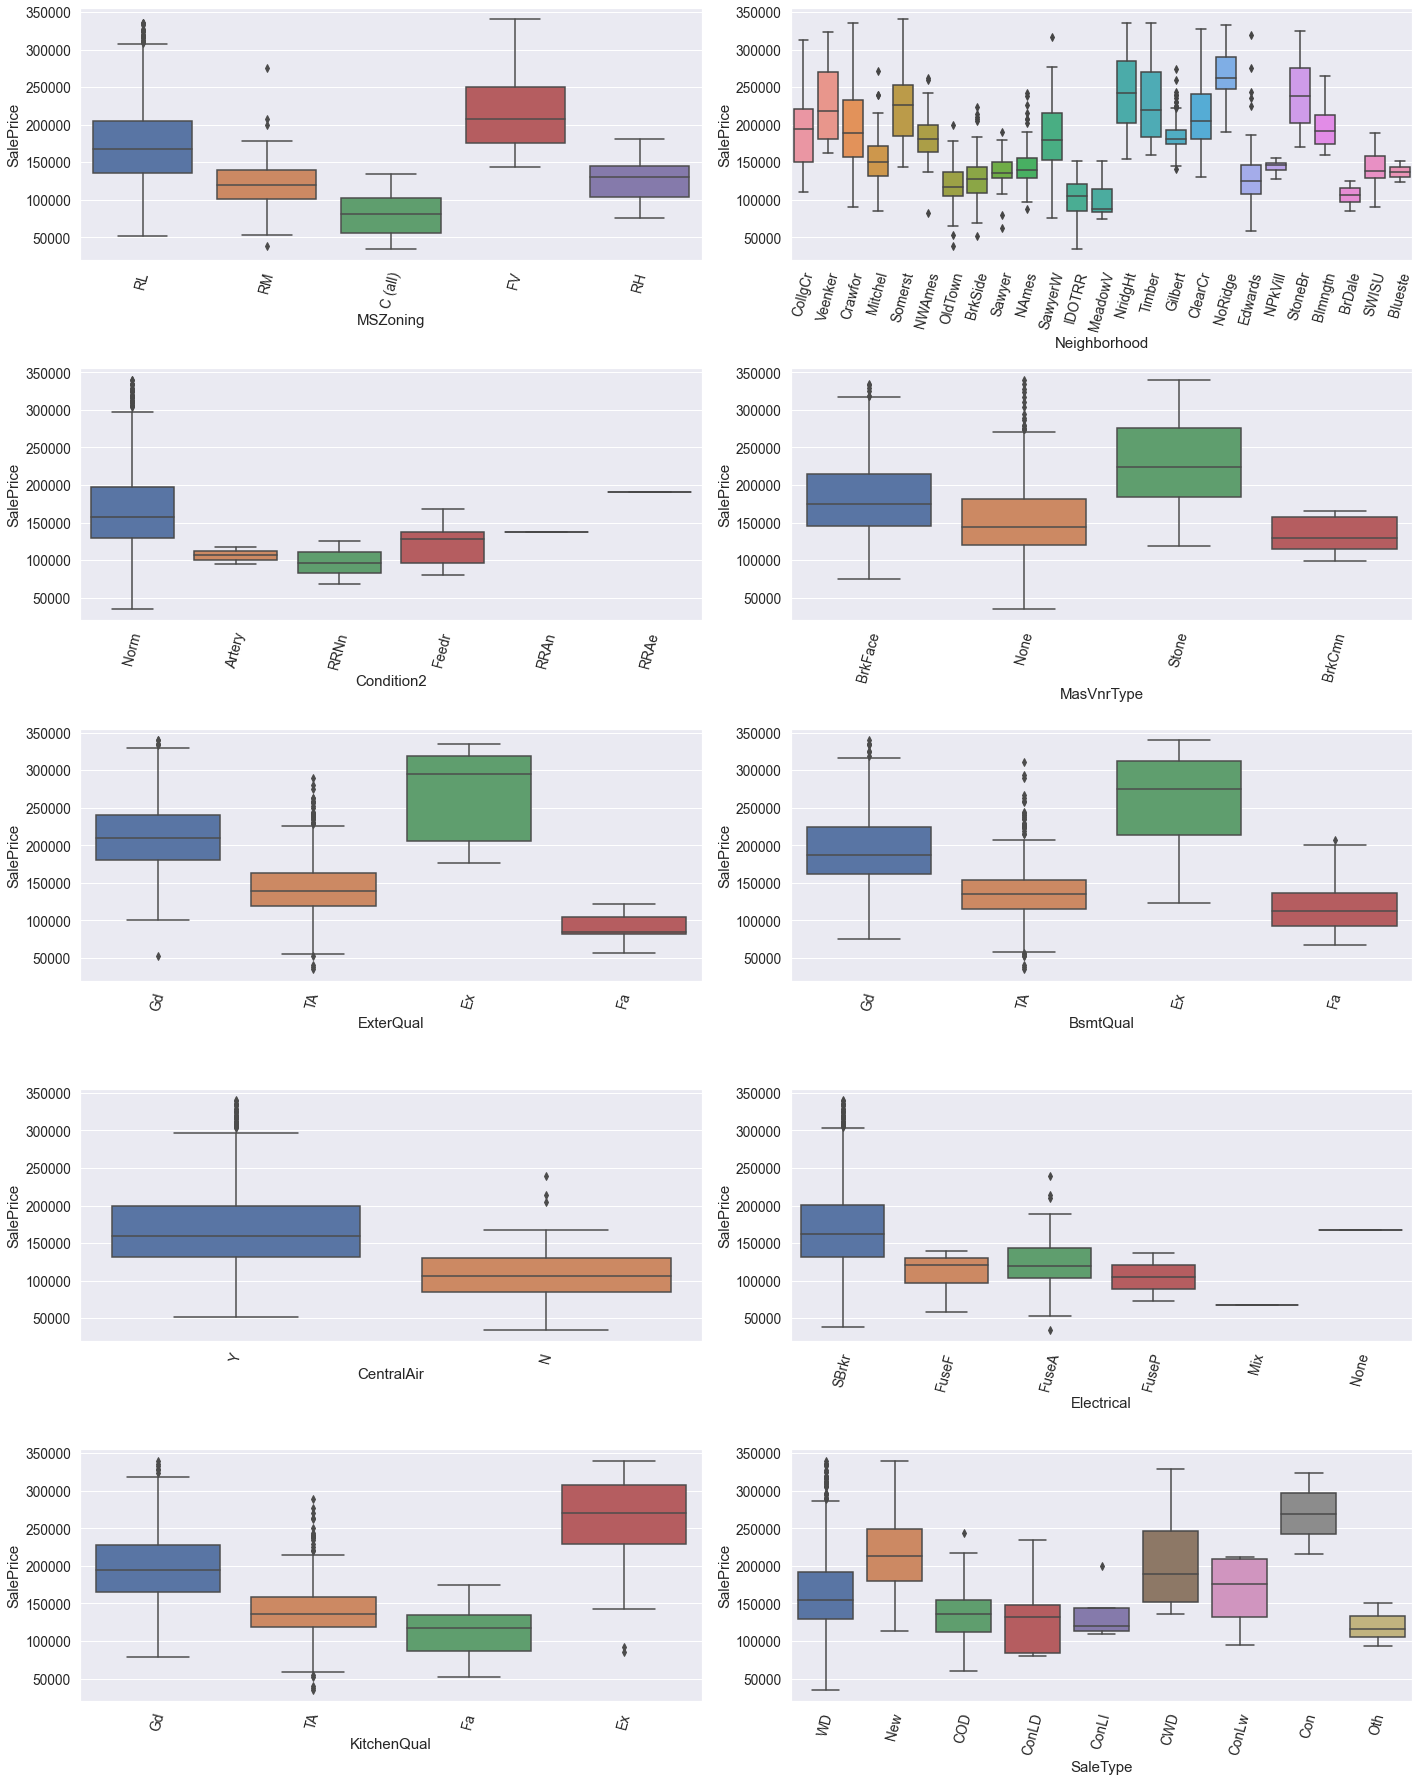

In [11]:
li_cat_feats = list(categorical_feats)
nr_rows = 5
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10, nr_rows*5))
for r in range(0, nr_rows):
    for c in range(0, nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            plt.xticks(rotation=80)
            plot = sns.boxplot(x=li_cat_feats[i], y=target, data=data, ax = axs[r][c])
            plt.setp(plot.get_xticklabels(), rotation=75)
plt.tight_layout()    
plt.show()   


## 6.2 Conclusion from EDA on categorical columns:

For many of the categorical there is no strong relation to the target.
However, for some fetaures it is easy to find a strong relation.

**How do we know that a categorical feature provides predictive value to the models? When feature distributions are disjoint for all categories in the feature.**

From the figures above these are : 'ExterQual, 'MSZoning', BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType' Also for the categorical features, I use only those that show a strong relation to SalePrice. However, by way of this example we will leave all the features,



# 7. Categorical to numerical values

Data Preprocessing is a very crucial step in every Machine learning model creation because the independent and dependent features should be as linearly aligned as possible i.e. the independent features should be separated as such that proper association can be made with the target feature such that the model accuracy gets increased. By Data Preprocessing we mean scaling the data, changing the categorical values to numerical ones, normalizing the data, etc. Today we will be discussing encoding the categorical variables into numeric ones using encoding techniques and will learn the differences between the different encodings. The programming language that we are taking here for reference is Python. Different encoding techniques that are present for preprocessing the data are **One Hot Encoding** and **Label Encoding**. Let us understand these two, one by one and try to learn the difference between the two:


- **Label Encoding**:
This is a data preprocessing technique where we try to convert the categorical column data type to numerical (from string to numeric). This is done because our machine learning model doesn’t understand string characters and therefore there should be a provision to encode them in a machine-understandable format. This is achieved with the Label Encoding method. In the Label Encoding method, the categories present under the categorical features are converted in a manner that is associated with hierarchical separation. This means that if we have categorical features where the categorical variables are linked with each other in terms of hierarchy then we should encode these features using Label Encoding. If Label Encoding is performed on non-hierarchical features then the accuracy of the model gets badly affected and hence it is not a good choice for non-hierarchical features.


- **One Hot Encoding**:
This is also an encoding technique in the field of Machine Learning where we try to convert the categorical string variables to numeric ones. The way it converts these features to numeric is very interesting. It creates dummy variables in the data which corresponds to the categorical variables. This means that each categorical feature is assigned a dummy column. The dummy columns are nothing but One Hot Vector in the n-dimensional space. This type of encoding technique is best suited for non-hierarchical features where there is no link of one variable with others. We can say that it is opposite to Label Encoder in the way it works. But, there is a drawback of One Hot Encoding which is also called Dummy Variable Trap. This means that the variables are highly correlated to each other and leads to multicollinearity issues. By multicollinearity, we mean dependency between the independent features and that is a problem. To avoid this kind of problem we drop one of the dummy variable columns and then try to execute our Machine learning model.

**In this example for simplicity (less features), we will do label encoding.**




In [12]:
categorical_feats

Index(['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
       'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType'],
      dtype='object')

In [13]:
all_data = data.copy()
le = preprocessing.LabelEncoder()
for col in categorical_feats:
    print(col)
    all_data[col] = le.fit_transform(all_data[col].values)

MSZoning
Neighborhood
Condition2
MasVnrType
ExterQual
BsmtQual
CentralAir
Electrical
KitchenQual
SaleType


In [14]:
all_data

SalePrice  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
0        208500            7       1710           2          856         2   
1        181500            6       1262           2         1262         2   
2        223500            7       1786           2          920         2   
3        140000            7       1717           3          756         1   
4        143000            5       1362           2          796         1   
...         ...          ...        ...         ...          ...       ...   
1215     175000            6       1647           2          953         2   
1216     210000            6       2073           2         1542         2   
1217     266500            7       2340           1         1152         2   
1218     142125            5       1078           1         1078         1   
1219     147500            5       1256           1         1256         1   

      YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces  MSZoning  Neighborhood  \
0          2003          2003       196.0           0         3             5   
1          1976          1976         0.0           1         3            24   
2          2001          2002       162.0           1         3             5   
3          1915          1970         0.0           1         3             6   
4          1993          1995         0.0           0         3            11   
...         ...           ...         ...         ...       ...           ...   
1215       1999          2000         0.0           1         3             8   
1216       1978          1988       119.0           2         3            14   
1217       1941          2006         0.0           2         3             6   
1218       1950          1996         0.0           0         3            12   
1219       1965          1965         0.0           0         3             7   

      Condition2  MasVnrType  ExterQual  BsmtQual  CentralAir  Electrical  \
0              2           1          2         2           1           5   
1              2           2          3         2           1           5   
2              2           1          2         2           1           5   
3              2           2          3         3           1           5   
4              2           2          3         2           1           5   
...          ...         ...        ...       ...         ...         ...   
1215           2           2          3         2           1           5   
1216           2           3          3         2           1           5   
1217           2           2          0         3           1           5   
1218           2           2          3         3           1           0   
1219           2           2          2         3           1           5   

      KitchenQual  SaleType  
0               2         8  
1               3         8  
2               2         8  
3               2         8  
4               3         8  
...           ...       ...  
1215            3         8  
1216            3         8  
1217            2         8  
1218            2         8  
1219            3         8  

[1220 rows x 20 columns]

# 8. Model development

## 8.1 Problem definition

We define our problem, identified features (independent variables) and model target (dependen variables), create a features matrix and target vector


In [15]:
# independent variables
features = list(all_data.columns)
features.remove("SalePrice")
features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'MSZoning',
 'Neighborhood',
 'Condition2',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'SaleType']

In [16]:
# dependent variables
target = ["SalePrice"]
target

['SalePrice']

In [17]:
# Model features (independent variables)
X = all_data[features]
# Model Target (dependent variable)
y = all_data[target]

In [18]:
X.shape

(1220, 19)

In [19]:
y.shape

(1220, 1)

In [20]:
std_features = all_data.describe()
std_features.reset_index(drop=False, inplace=True)
std_features = std_features[std_features["index"] == "std"]
std_features.drop(columns=["index"], inplace=True)
std_features.reset_index(drop=True, inplace=True)
std_features = std_features.T
std_features.reset_index(drop=False, inplace=True)
std_features.columns = ["features", "std"]
std_features

features           std
0      SalePrice  54452.600535
1    OverallQual      1.181227
2      GrLivArea    409.453557
3     GarageCars      0.696273
4    TotalBsmtSF    315.000356
5       FullBath      0.525750
6      YearBuilt     29.654468
7   YearRemodAdd     20.685193
8     MasVnrArea     94.320884
9     Fireplaces      0.617837
10      MSZoning      0.636260
11  Neighborhood      6.057675
12    Condition2      0.174218
13    MasVnrType      0.572796
14     ExterQual      0.544157
15      BsmtQual      0.732639
16    CentralAir      0.235752
17    Electrical      1.299335
18   KitchenQual      0.725193
19      SaleType      1.537059

In [21]:
mean_features = all_data.describe()
mean_features.reset_index(drop=False, inplace=True)
mean_features = mean_features[mean_features["index"] == "mean"]
mean_features.drop(columns=["index"], inplace=True)
mean_features.reset_index(drop=True, inplace=True)
mean_features = mean_features.T
mean_features.reset_index(drop=False, inplace=True)
mean_features.columns = ["features", "mean"]
mean_features

features           mean
0      SalePrice  166643.919672
1    OverallQual       5.941803
2      GrLivArea    1421.438525
3     GarageCars       1.681148
4    TotalBsmtSF    1020.522951
5       FullBath       1.506557
6      YearBuilt    1970.145082
7   YearRemodAdd    1984.215574
8     MasVnrArea      57.876321
9     Fireplaces       0.554918
10      MSZoning       3.035246
11  Neighborhood      11.908197
12    Condition2       1.999180
13    MasVnrType       1.793443
14     ExterQual       2.634426
15      BsmtQual       2.376230
16    CentralAir       0.940984
17    Electrical       4.618033
18   KitchenQual       2.430328
19      SaleType       7.550000

## 8.2 Standarize our data


**Data standardization** is this process of making sure that your data set can be compared to other data sets. It’s a key part of research, and it’s something that everyone who uses data should consider before they even collect, clean, or analyze their first data point.

**What is data standardization exactly?**
Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format.

Standardized values are useful for tracking data that isn’t easy to compare otherwise.

For example, suppose you and your friend went to different universities. One day, you both got your midterm grades for your Physics 101 classes. Your professor sticks to the normal grading scale (out of 100), so you got a grade of 84; the test has a mean of 77 and a standard deviation of 6. Your friend’s professor, though, uses his own grading scale, so she got a grade of 452. Her test has a scale of 750, mean of 400, and standard deviation of 100.

Both of you scored above average, but who did better? While the main data points might not be immediately comparable, there is a way to standardize and compare the data points. Converting them to percentages shows that you came out ahead, with an 84% compared to your friend’s 60%.






In [22]:
# create object to scaler data
sc = StandardScaler()
# training
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=features)

## 9.3 Train-Test Split Evaluation


The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

In this example we are going to train with 976 observations and testing our algorithms with 244 



In [23]:
# split data on training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [24]:
print("Training Features dimentions:", X_train.shape)
print("Testing Features dimentions:", X_test.shape)

Training Features dimentions: (976, 19)
Testing Features dimentions: (244, 19)


## 8.4 Model selection

The best model is not always the most complicated. Sometimes including variables that are not evidently important can actually reduce the accuracy of predictions. In this section we do model selection looking best results over diferents model hyperparameters


In [25]:
# define model evaluation method
ratios = arange(0, 1, 0.005)
alphas = np.logspace(-10, 2, 100)
fit_intercept = [True, False]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, fit_intercept=fit_intercept, n_jobs=3)
# fit model
model = model.fit(X_train, y_train)

In [26]:
# Choosen hupyerparams
alpha = model.alpha_
l1_ratio = model.l1_ratio_
# Coeficients on linear regression
coeficients = model.coef_
intercept = model.intercept_
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)
print('coeficients:', coeficients)
print('intercept:', intercept)

alpha: 0.013219
l1_ratio_: 0.120000
coeficients: [12118.9890591  20279.89823997  4115.26936442 10474.90496549
 -4277.34308452  5440.76010336  5105.36456781  1372.1853426
  5030.3636369  -2801.54294422  -373.53325087   536.6684796
  1994.8935129  -1768.80139024 -4822.63879431  3828.91496444
  1875.13621571 -5440.92092357  1149.35447277]
intercept: 167274.7447714672


## 8.5 Model Training

In [27]:
# creating Regression Model
regression_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)

In [28]:
# Training regression model
regression_model = regression_model.fit(X_train, y_train)

In [29]:
# summarize chosen configuration
coeficients = regression_model.coef_
intercept = regression_model.intercept_
# summarize chosen configuration
print('coeficients:', coeficients)
print('intercept:', intercept)

coeficients: [12118.9890591  20279.89823997  4115.26936442 10474.90496549
 -4277.34308452  5440.76010336  5105.36456781  1372.1853426
  5030.3636369  -2801.54294422  -373.53325087   536.6684796
  1994.8935129  -1768.80139024 -4822.63879431  3828.91496444
  1875.13621571 -5440.92092357  1149.35447277]
intercept: [167274.74477147]


## 8.6 Model Evaluation

### 8.6.1 Model Predictions

In [30]:
# Model inference (predictions)
y_pred = regression_model.predict(X_test)
# Reshape vector to have same dimensions
y_pred = np.reshape(y_pred,(-1, 1)) 
y_test = np.reshape(y_test,(-1, 1)) 

### 8.6.2 Results Visualization

In [31]:
def plot_xy_results(y_pred, y_test, name="Regularized Regression"):
    """
    Plot sequence de la secuecnia

    Parameters
    ----------
    predictions : array
        predicciones.
    real : array
        valores reales.
    fechas : array
        array de fechas.
    indice : TYPE
        indice de la columna.
    
    Returns
    -------
    plot de prediciones vs real.
    
    """
    letter_size = 20
    mae = np.abs(y_pred - y_test).mean()
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r2 = r2_score(y_test, y_pred)
    mae = str(round(mae, 4))
    mape = str(round(mape, 4))
    mse = str(round(mse, 4))
    rmse = str(round(rmse, 4))
    r2 = str(round(r2, 4))

    fig, ax = plt.subplots(1, figsize=(22, 12))
    plt.scatter(y_test, y_test, color='red')
    plt.scatter(y_test, y_pred, color='k')
    title = f"{name}" + "\n" + f"R2: {r2}" + "\n" + f"MAPE: {str(mape)}" + "\n" + f"MAE: {str(mae)}"
    plt.title(title, fontsize=30)
    plt.xlabel('Real', fontsize=30)
    plt.ylabel('Predictions', fontsize=30)
    plt.grid(color='silver', linestyle='-', linewidth=2)
    ax.tick_params(axis='both', which='major', labelsize=22)
    plt.legend(['Real Test Set', 'Prediction Test Set'], loc='upper left',
               prop={'size': letter_size+5})
    plt.show()

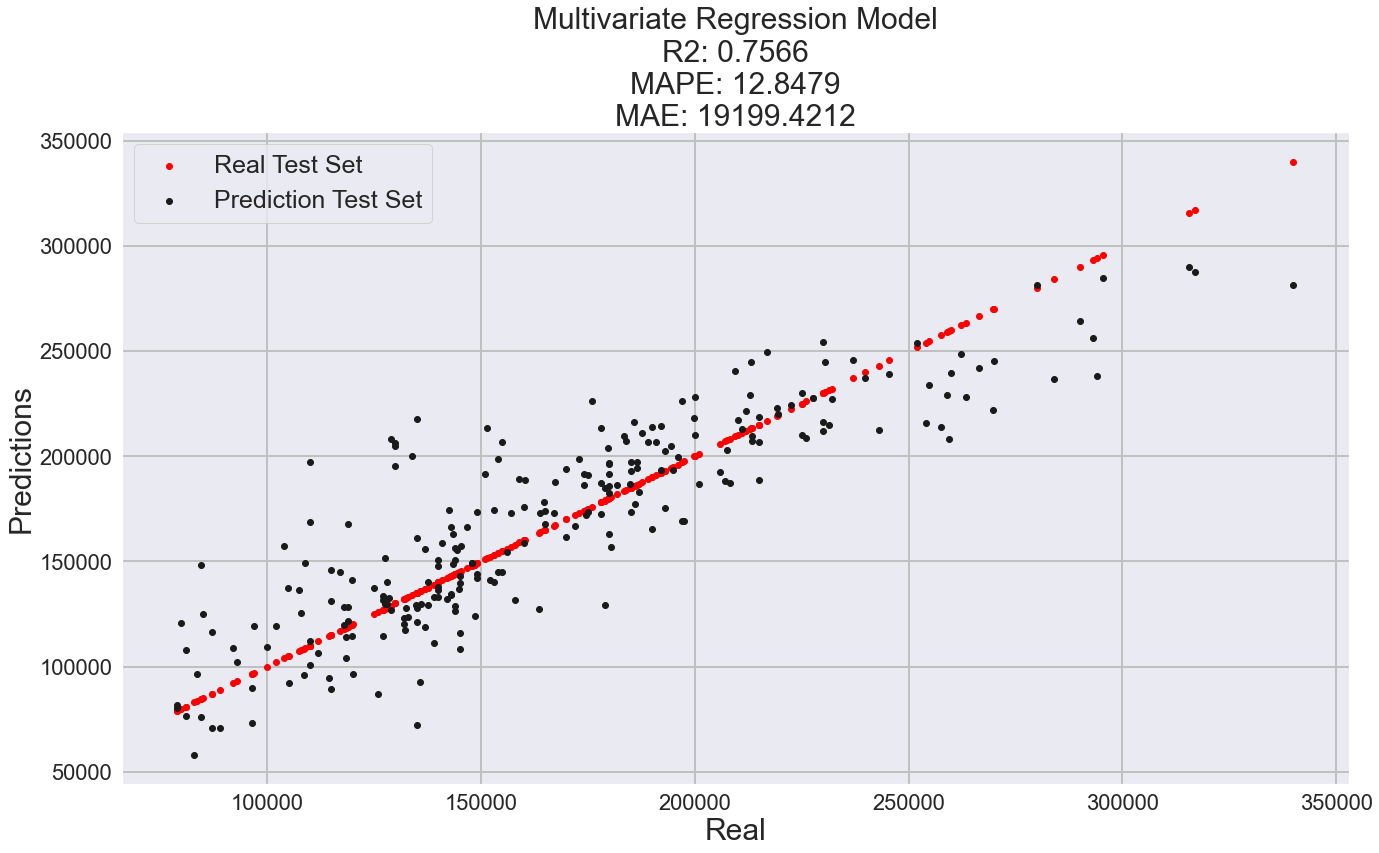

In [32]:
# ploting results
plot_xy_results(y_pred, y_test, name="Multivariate Regression Model")

### 8.6.3 Metrics evaluation

#### Metrics explanation

https://www.aionlinecourse.com/tutorial/machine-learning/evaluating-regression-models-performance


In [33]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred) * 100

mape = str(round(mape, 4))
mse = str(round(mse, 4))
rmse = str(round(rmse, 4))
r2 = str(round(r2, 4))

print("MAPE:", mape, "[%]")
print("R2:", r2, "[%]")
print("MEAN ABSOLUTE ERROR:", "$", mae)
print("MEAN SQUARED ERROR:", "$**2", mse)
print("ROOT MEAN SQUARED ERROR:", "$", rmse)

MAPE: 12.8479 [%]
R2: 75.6645 [%]
MEAN ABSOLUTE ERROR: $ 19199.42124968681
MEAN SQUARED ERROR: $**2 656280814.9581
ROOT MEAN SQUARED ERROR: $ 25617.9784


**An average error of $ 19.199 is obtained on a variable with an average of 166.000, an error of 12%.
Pretty good model, considering that we are using the basic techniques of feature engineering and the most basic model in Machine Learning, these errors can be lowered, using other advanced algorithms (bagging and boosting methods, SVM, Neural nets, etc), in which it has been proven to reach 5% Mean percentage error**

## 8.7 Model Interpretation

Interpreting Regression Coefficients for Linear Relationships
The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.


In [34]:
feats = pd.DataFrame(X_test.columns, columns=["features"])
coeficients = pd.DataFrame(coeficients, columns=["coeficients"])

### 9.7.1 To read this coeficients take:
**A change of 1 standard deviation in X is associated with a change of β standard deviations of Y**


In [35]:
interpret = pd.concat([feats, coeficients], axis=1)
interpret["coeficients_abs"] = interpret["coeficients"].apply(abs)
interpret.sort_values(by=["coeficients_abs"], ascending=False, inplace=True)
interpret.reset_index(drop=True, inplace=True)
interpret = interpret.merge(std_features, on=["features"], how="outer")
interpret = interpret.merge(mean_features, on=["features"], how="outer")
interpret

features   coeficients  coeficients_abs           std           mean
0      GrLivArea  20279.898240     20279.898240    409.453557    1421.438525
1    OverallQual  12118.989059     12118.989059      1.181227       5.941803
2    TotalBsmtSF  10474.904965     10474.904965    315.000356    1020.522951
3    KitchenQual  -5440.920924      5440.920924      0.725193       2.430328
4      YearBuilt   5440.760103      5440.760103     29.654468    1970.145082
5   YearRemodAdd   5105.364568      5105.364568     20.685193    1984.215574
6     Fireplaces   5030.363637      5030.363637      0.617837       0.554918
7       BsmtQual  -4822.638794      4822.638794      0.732639       2.376230
8       FullBath  -4277.343085      4277.343085      0.525750       1.506557
9     GarageCars   4115.269364      4115.269364      0.696273       1.681148
10    CentralAir   3828.914964      3828.914964      0.235752       0.940984
11      MSZoning  -2801.542944      2801.542944      0.636260       3.035246
12    MasVnrType   1994.893513      1994.893513      0.572796       1.793443
13    Electrical   1875.136216      1875.136216      1.299335       4.618033
14     ExterQual  -1768.801390      1768.801390      0.544157       2.634426
15    MasVnrArea   1372.185343      1372.185343     94.320884      57.876321
16      SaleType   1149.354473      1149.354473      1.537059       7.550000
17    Condition2    536.668480       536.668480      0.174218       1.999180
18  Neighborhood   -373.533251       373.533251      6.057675      11.908197
19     SalePrice           NaN              NaN  54452.600535  166643.919672

In [36]:
predictions = regression_model.predict(X)
predictions = np.reshape(predictions, (-1, 1)) 
all_data["Predictions"] = predictions

**The following features were the most important and have the greatest impact on the models.**

- GrLivArea: Above grade (ground) living area square feet
- OverallQual: Overall material and finish quality
- TotalBsmtSF: Total square feet of basement area

We determined that the area and quality of construction material are the most significant factor on house prices, over Zones or Neighborhood, things that intuitively make sense be the most important (but not).

If we wanted to increase the valuation of the houses, I would look for an economic trade off between quality of building material and the area available to make the houses, as shown in the following parallel plot, medium área and high quality, give us a high house price, to interpret the solution !!plot, **medium área and high quality, give us a high house price !!**


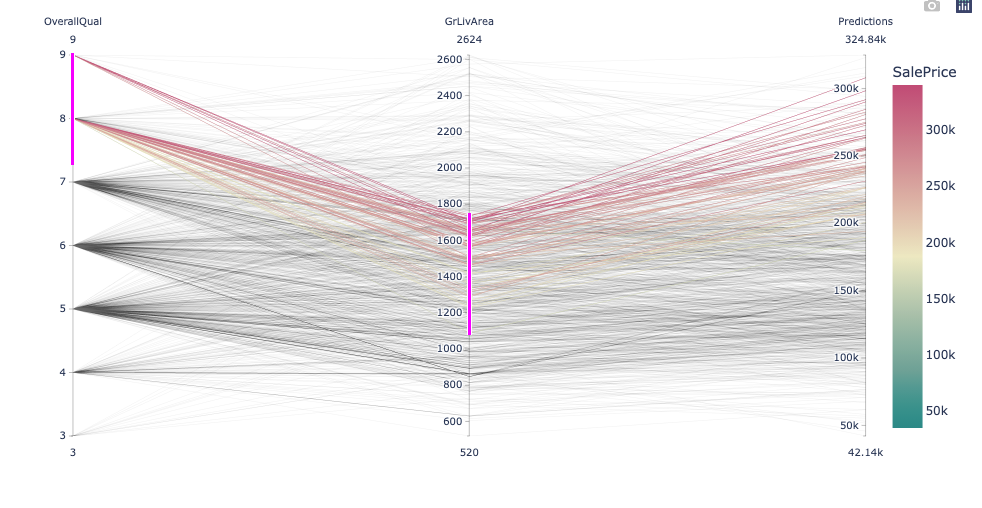

### 8.7.2 Parallel plot, model understanding

In [37]:
fig = px.parallel_coordinates(all_data, color="SalePrice",
                              dimensions=['GrLivArea', 'OverallQual', 'Predictions'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

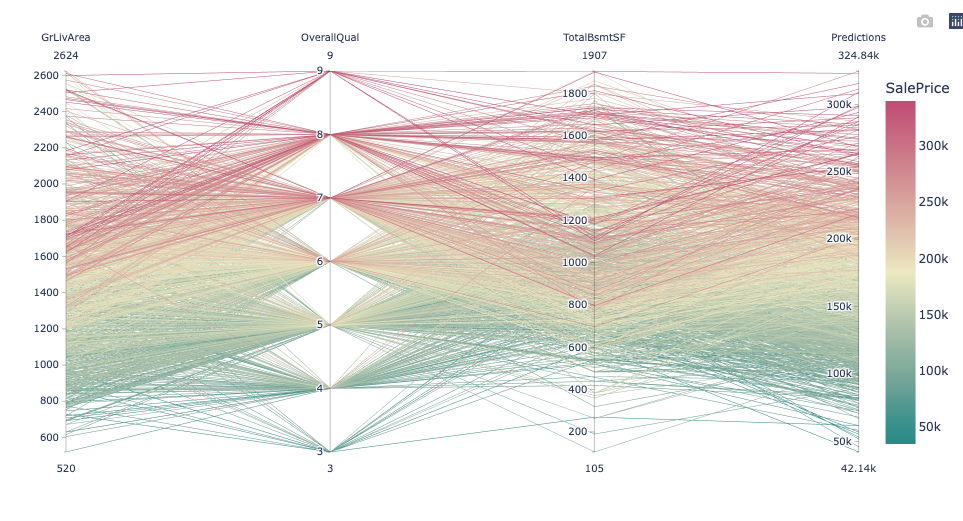

# 10. EXTRA:  Other ML Models


This part is an extra, in order to understand how other machine learning models can improve the performance seen in linear regression.


## 10.0 RulesFit

Set of rules that are interpreted as regression, output from the creation of a decision tree.

In [38]:
from sklearn import metrics
from imodels import RuleFitRegressor

In [39]:
# Feature names
feat_names = list(X.columns)

# fit a rulefit model
rulefit = RuleFitRegressor(max_rules=10)
rulefit.fit(X_train, y_train, feature_names=feat_names)

# get test performance
y_pred = rulefit.predict(X_test)
y_pred = np.reshape(y_pred,(-1, 1)) 

# inspect and print the rules
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

# 'rule' is how the feature is constructed
# 'coef' is its weight in the final linear model
# 'support' is the fraction of points it applies to
rules[['rule', 'coef', 'support']].style.background_gradient(cmap='YlOrBr')

In [40]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred) * 100

mape = str(round(mape, 4))
mse = str(round(mse, 4))
rmse = str(round(rmse, 4))
r2 = str(round(r2, 4))

print("MAPE:", mape, "[%]")
print("R2:", r2, "[%]")
print("MEAN ABSOLUTE ERROR:", "$", mae)
print("MEAN SQUARED ERROR:", "$**2", mse)
print("ROOT MEAN SQUARED ERROR:", "$", rmse)

MAPE: 12.3506 [%]
R2: 75.7086 [%]
MEAN ABSOLUTE ERROR: $ 18952.798257757997
MEAN SQUARED ERROR: $**2 655092769.8522
ROOT MEAN SQUARED ERROR: $ 25594.7801


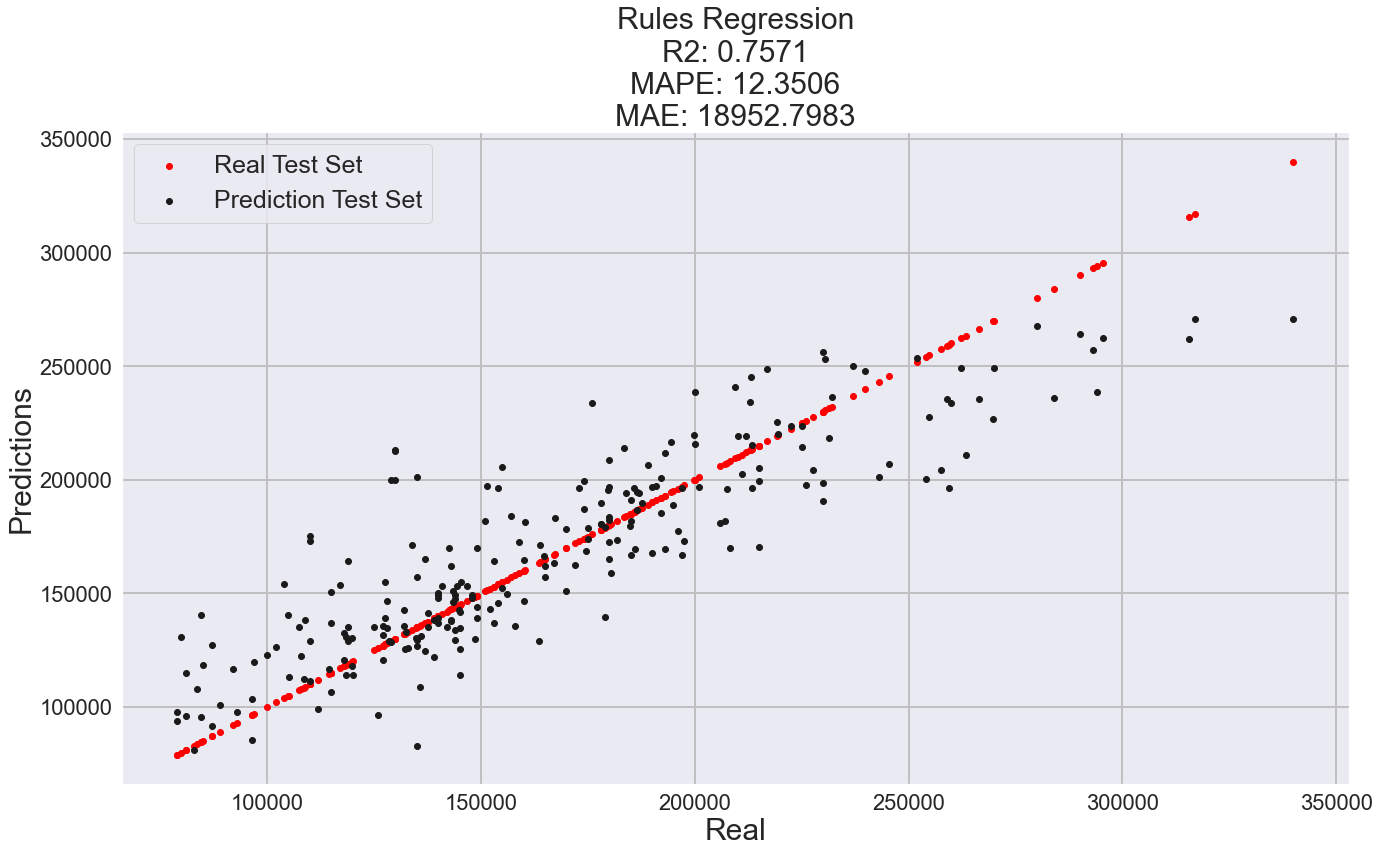

In [41]:
# ploting results
plot_xy_results(y_pred, y_test, name="Rules Regression")

## 10.1 k-NN Models

Go deeper on ML models and predictive power.

In [42]:
# list of scores from k_range
k_range = range(1, 150)
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='r2')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append([k, scores.mean()])
k_scores = pd.DataFrame(k_scores, columns=["n_neighbors", "score"])
k_scores.sort_values(by=["score"], ascending=False, inplace=True)
k_scores.reset_index(drop=True, inplace=True)
k_scores.head()

n_neighbors     score
0            6  0.790084
1            8  0.789941
2            9  0.788845
3            7  0.788476
4            5  0.787697

In [43]:
best_k = k_scores["n_neighbors"].iloc[0]
knn_model = KNeighborsRegressor(n_neighbors=best_k)

In [44]:
knn_model = knn_model.fit(X_train, y_train)

In [45]:
y_pred = knn_model.predict(X_test)

In [46]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred) * 100

mape = str(round(mape, 4))
mse = str(round(mse, 4))
rmse = str(round(rmse, 4))
r2 = str(round(r2, 4))

print("MAPE:", mape, "[%]")
print("R2:", r2, "[%]")
print("MEAN ABSOLUTE ERROR:", "$", mae)
print("MEAN SQUARED ERROR:", "$**2", mse)
print("ROOT MEAN SQUARED ERROR:", "$", rmse)

MAPE: 11.0619 [%]
R2: 79.4421 [%]
MEAN ABSOLUTE ERROR: $ 17420.438524590165
MEAN SQUARED ERROR: $**2 554405468.3151
ROOT MEAN SQUARED ERROR: $ 23545.8164


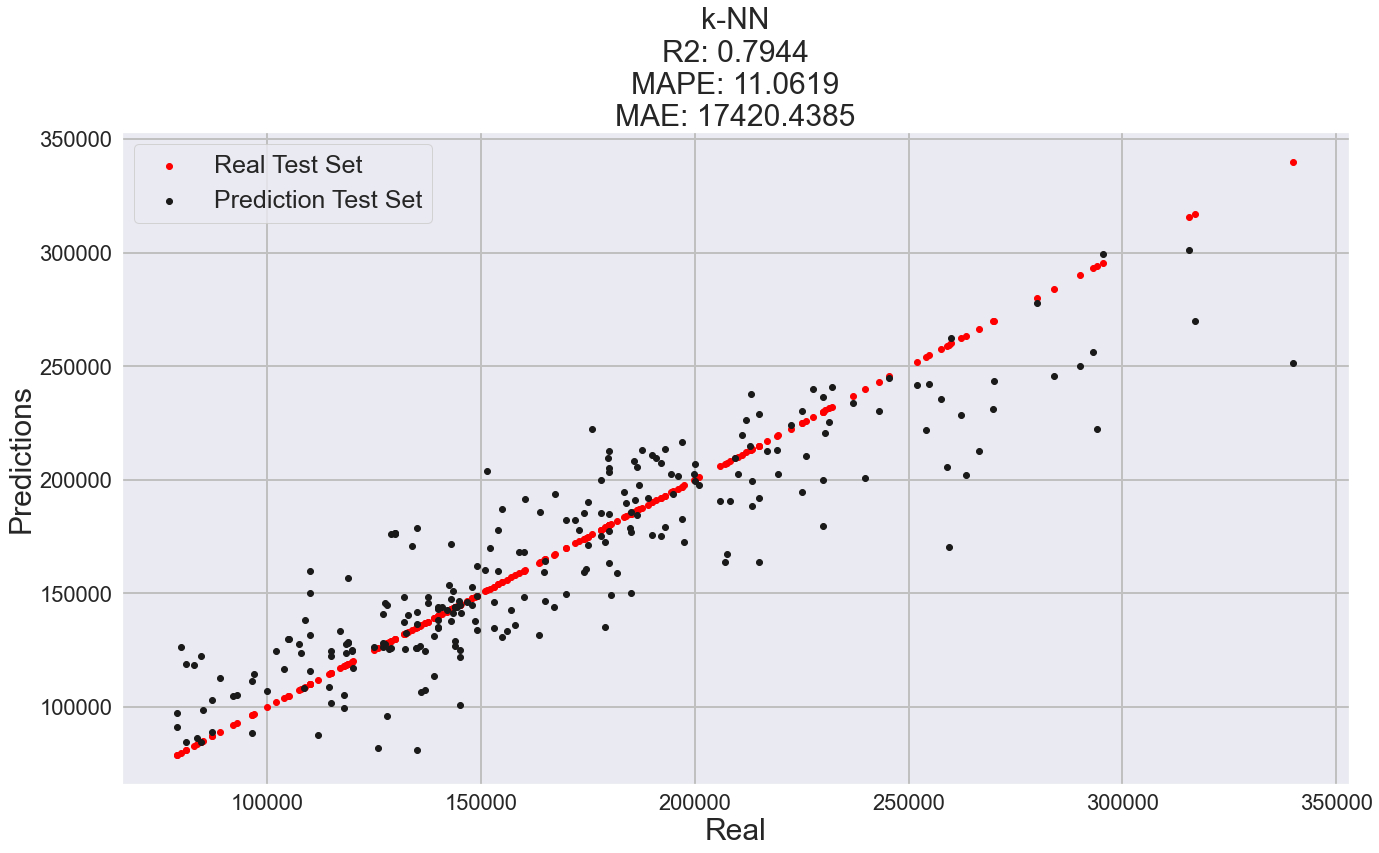

In [47]:
plot_xy_results(y_pred, y_test, name="k-NN")

## 10.3 Random Forest 

In [48]:
params = {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1,
          'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
random_forest = RandomForestRegressor(**params)

In [49]:
random_forest = random_forest.fit(X_train, y_train)

In [50]:
y_pred = random_forest.predict(X_test)
# Reshape vector to have same dimensions
y_pred = np.reshape(y_pred,(-1, 1)) 
y_test = np.reshape(y_test,(-1, 1)) 

In [51]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred) * 100

mape = str(round(mape, 4))
mse = str(round(mse, 4))
rmse = str(round(rmse, 4))
r2 = str(round(r2, 4))

print("MAPE:", mape, "[%]")
print("R2:", r2, "[%]")
print("MEAN ABSOLUTE ERROR:", "$", mae)
print("MEAN SQUARED ERROR:", "$**2", mse)
print("ROOT MEAN SQUARED ERROR:", "$", rmse)

MAPE: 9.8949 [%]
R2: 83.5282 [%]
MEAN ABSOLUTE ERROR: $ 15508.42619877049
MEAN SQUARED ERROR: $**2 444211068.805
ROOT MEAN SQUARED ERROR: $ 21076.3154


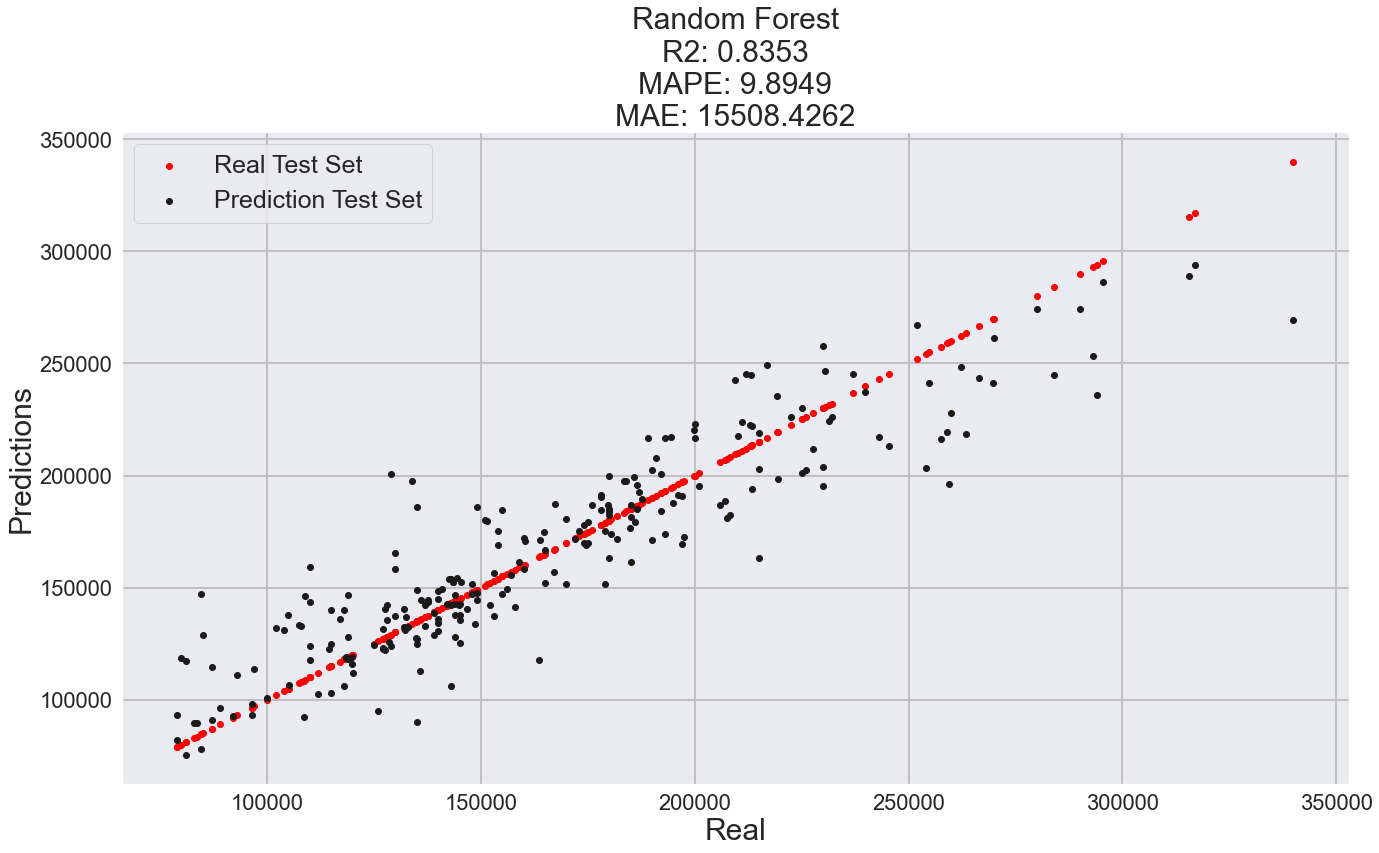

In [52]:
plot_xy_results(y_pred, y_test, name="Random Forest")

Using k-nearest-neighbor, we were able to reduce the error by 1% in MAPE and increase the R2 of the model by 3%.
And by using random forest we were able to reduce 2% on MAPE achiving 9% error and 6 % improvements on R2.
This is the way of improvement, from now on many ML models will be tested in order to improve this error. 

- Decision trees
- Support vector regressor
- Bagging and boosting methods (random forest and xgboost, more hyperparameters)
- Neural nets architectures
- Assembly algorithms

It is important to understand that most of the improvements are made in the feature engineering stage, where more features (variables) are created, many times the problem is not in the models used, but in what feeds them (their variables).
